In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [17]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:\\Users\\ANKITA\\Downloads\\train\\train'
valid_path = 'C:\\Users\\ANKITA\\Downloads\\val\\val'

In [18]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [20]:
# useful for getting number of output classes
folders = glob('C:\\Users\\ANKITA\\Downloads\\train\\train\\*')

In [21]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [23]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\ANKITA\\Downloads\\train\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [27]:
test_set = test_datagen.flow_from_directory('C:\\Users\\ANKITA\\Downloads\\val\\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 93s 2s/step - loss: 2.0102 - accuracy: 0.7524 - val_loss: 0.6090 - val_accuracy: 0.8673
Epoch 2/20
61/61 [==============================] - 81s 1s/step - loss: 0.6928 - accuracy: 0.8831 - val_loss: 1.1149 - val_accuracy: 0.8580
Epoch 3/20
61/61 [==============================] - 83s 1s/step - loss: 0.8206 - accuracy: 0.8893 - val_loss: 0.6726 - val_accuracy: 0.9074
Epoch 4/20
61/61 [==============================] - 82s 1s/step - loss: 0.9426 - accuracy: 0.8770 - val_loss: 1.1105 - val_accuracy: 0.8673
Epoch 5/20
61/61 [==============================] - 77s 1s/step - loss: 0.7659 - accuracy: 0.9031 - val_loss: 1.0777 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 77s 1s/step - loss: 0.5240 - accuracy: 0.9441 - val_loss: 0.5816 - val_accuracy: 0.9043
Epoch 7/20
61/61 [==============================] - 77s 1s/step - loss: 0.5603 - acc

In [29]:
import matplotlib.pyplot as plt

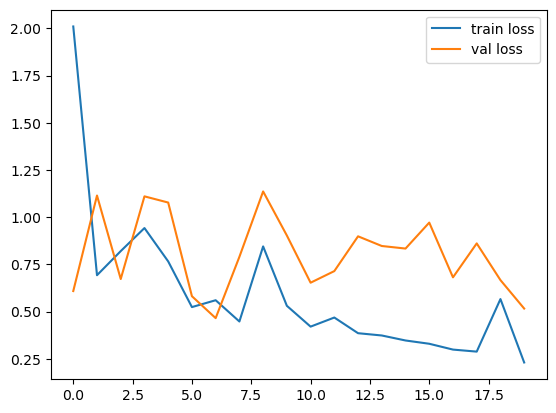

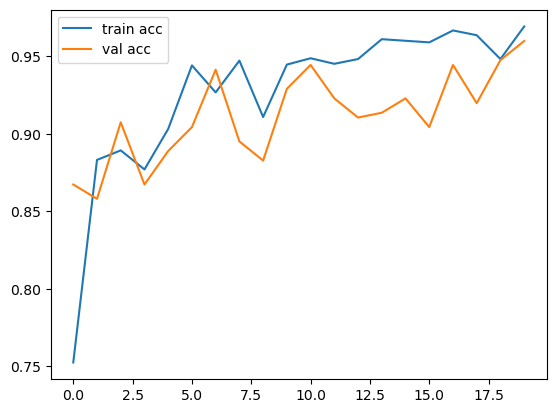

<Figure size 640x480 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [32]:
y_pred = model.predict(test_set)

In [33]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 4.6035430e-35, 0.0000000e+00],
       [1.9971656e-33, 2.3446485e-21, 0.0000000e+00, 1.0000000e+00],
       [4.6187902e-06, 5.9829904e-03, 9.9401242e-01, 3.0798599e-08],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 8.1900062e-19],
       [0.0000000e+00, 3.4927662e-23, 2.2222301e-38, 1.0000000e+00],
       [7.0514951e-22, 1.0000000e+00, 2.8429950e-28, 4.3809049e-18]],
      dtype=float32)

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 0, 2, 3, 1, 2, 3, 3, 3, 2, 0, 1, 2,
       1, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 3, 1, 3, 3,
       3, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 0, 0, 3, 1, 1, 1, 2, 1, 3,
       3, 1, 1, 2, 3, 3, 1, 0, 1, 3, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 3,
       3, 0, 3, 3, 1, 3, 3, 0, 2, 2, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 0, 1,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 0, 1,
       1, 3, 2, 3, 1, 3, 2, 3, 3, 0, 2, 2, 3, 3, 2, 3, 3, 1, 2, 2, 0, 3,
       1, 3, 2, 3, 0, 0, 0, 0, 2, 1, 3, 2, 2, 1, 2, 3, 3, 2, 1, 0, 3, 2,
       2, 2, 1, 3, 2, 1, 0, 0, 1, 1, 1, 2, 1, 3, 2, 1, 2, 3, 1, 1, 2, 3,
       2, 1, 1, 2, 3, 2, 0, 2, 0, 0, 3, 2, 0, 0, 3, 3, 1, 1, 1, 2, 1, 3,
       2, 3, 2, 3, 1, 2, 3, 0, 2, 2, 2, 3, 0, 3, 0, 1, 1, 1, 3, 3, 1, 2,
       1, 3, 1, 2, 3, 3, 1, 1, 2, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 2, 3, 3, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       3, 1, 3, 2, 0, 3, 2, 0, 0, 2, 3, 1, 0, 2, 3,